# first of we load files and import libraries

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

V = pd.read_csv('Arkusz_31_2.csv', header=None)  # Load the voltage data
V2 = pd.read_csv('Arkusz_31_4.csv', header=None)  # Load the voltage data
V = V.iloc[::-1].reset_index(drop=True)
V2 = V2.iloc[::-1].reset_index(drop=True)

# Najpierw zobaczymy jak wygląda pole elektrostatyczne wewnątrz kondensatora płaskiego

(-1.0, 5.5)

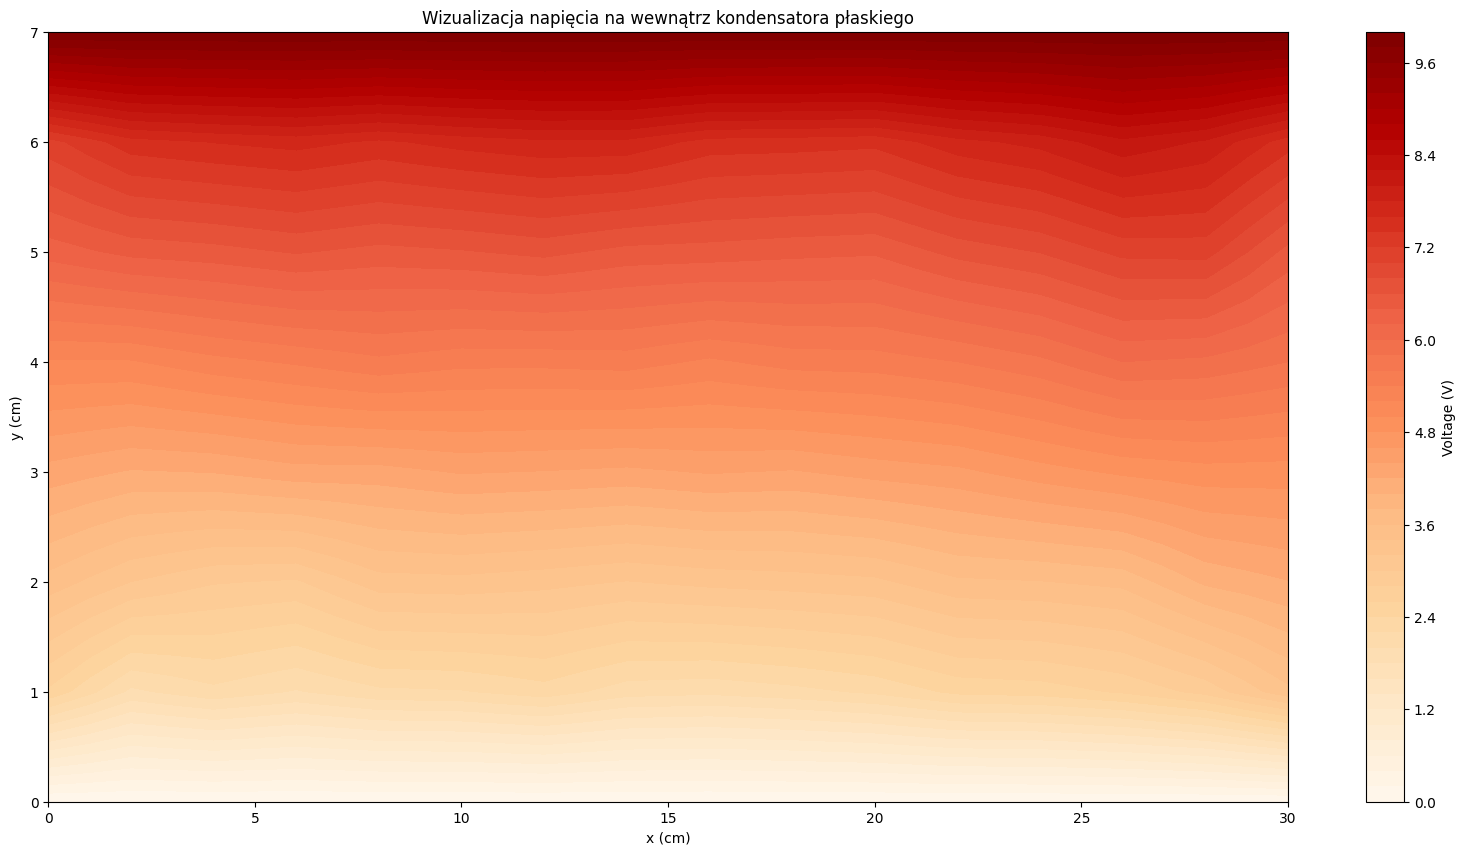

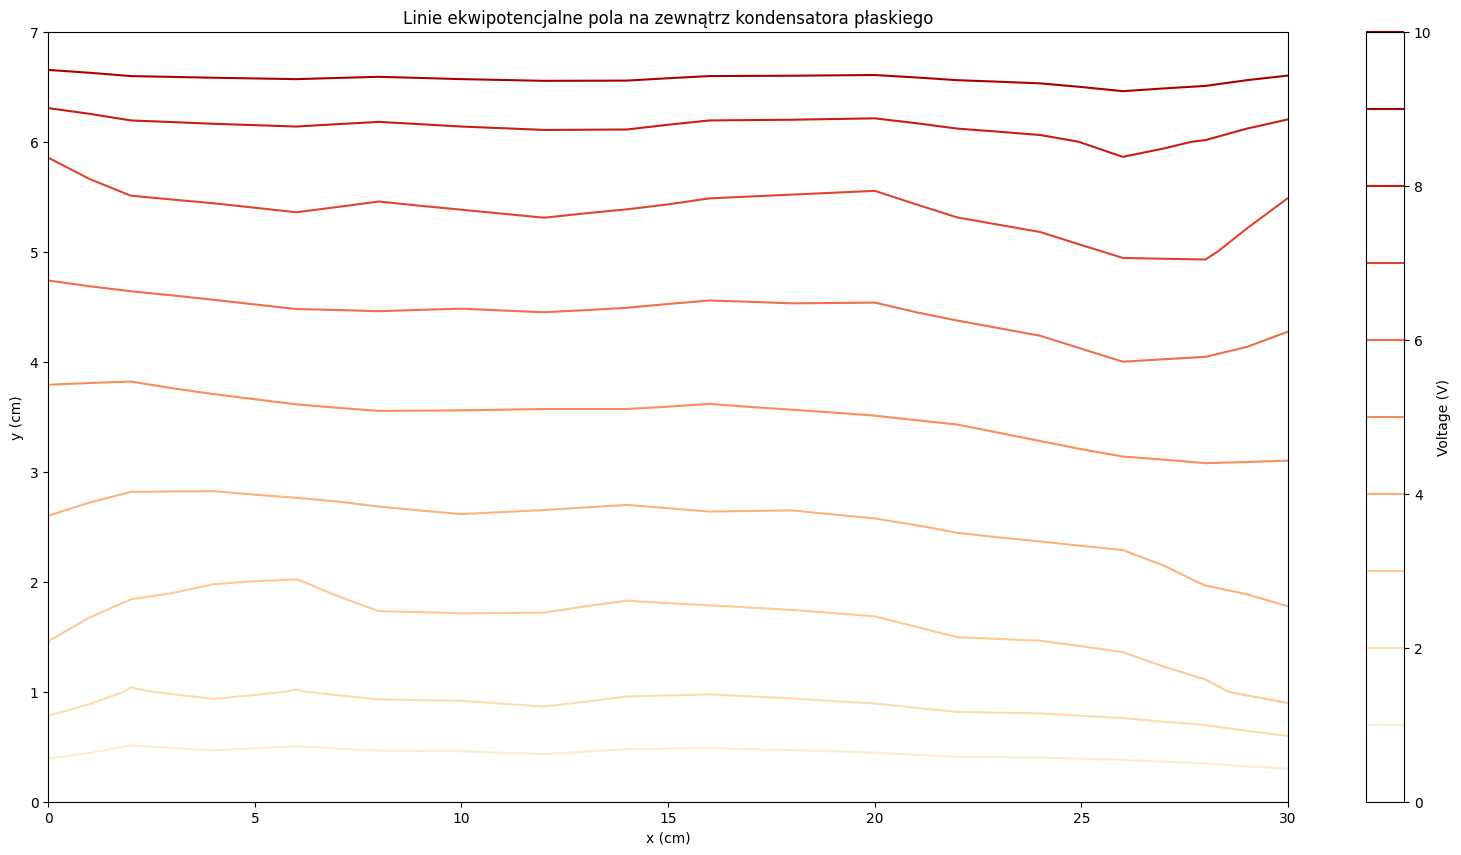

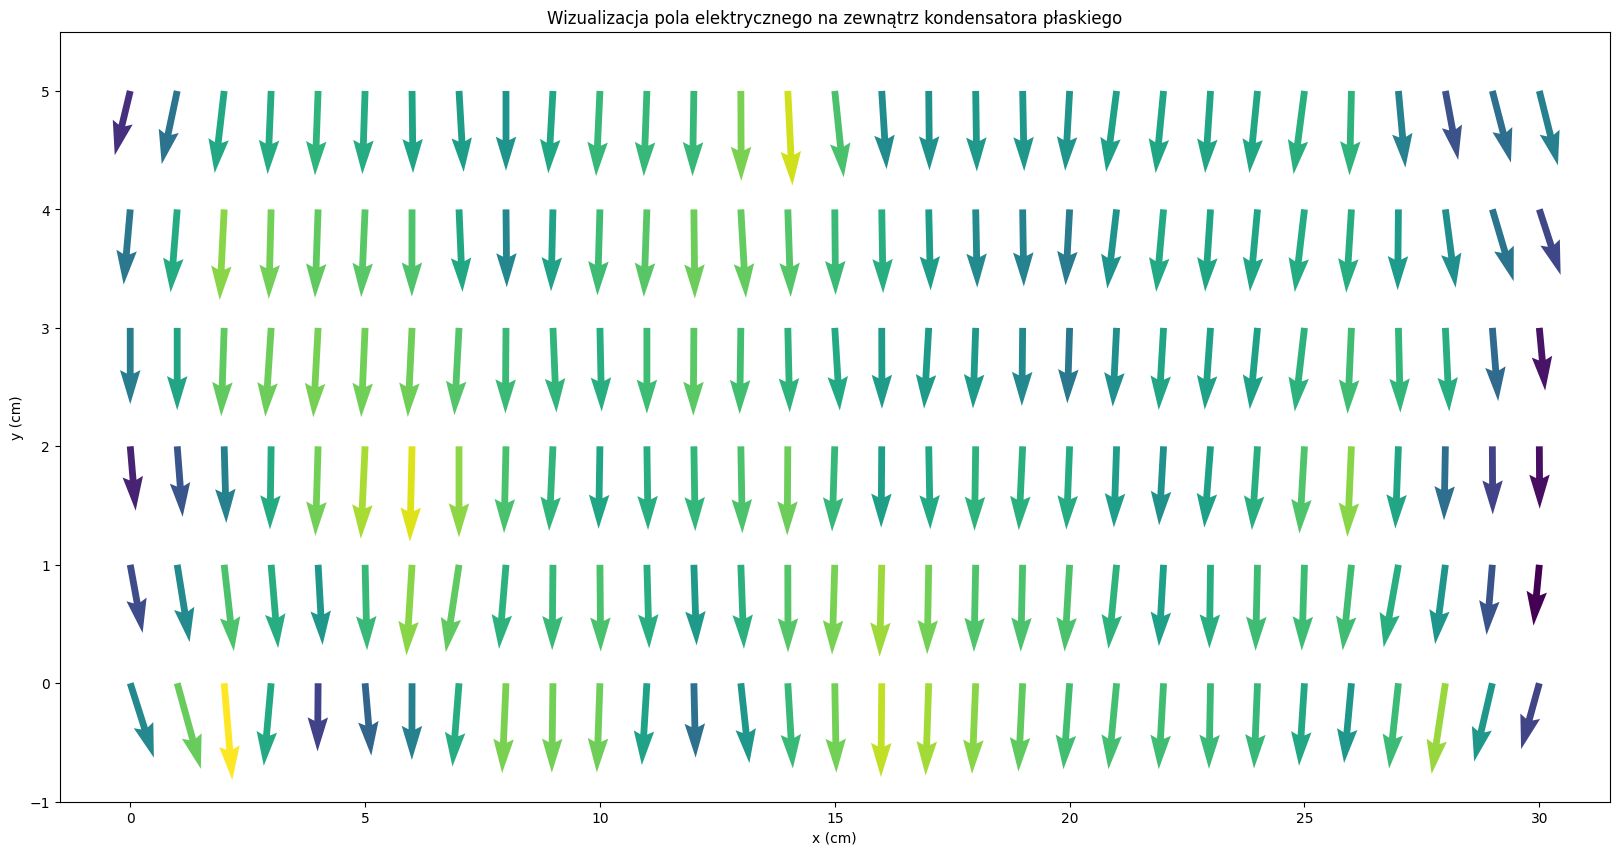

In [123]:
grid_size_x = V.shape[1]
grid_size_y = V.shape[0]
x = np.arange(grid_size_x)  # X-coordinates
y = np.arange(grid_size_y)  # Y-coordinates
X, Y = np.meshgrid(x, y)  # Create a grid of coordinates
new_V = V.iloc[1:-1]
new_X, new_Y = np.meshgrid(np.arange(new_V.shape[1]), np.arange(new_V.shape[0]))

# Step 4: Plot the electric field vectors using quiver
plt.figure(figsize=(20, 10))
plt.contourf(X, Y, V, levels=50, cmap='OrRd')
plt.colorbar(label='Voltage (V)')
plt.title('Wizualizacja napięcia na wewnątrz kondensatora płaskiego')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')

plt.figure(figsize=(20, 10))
plt.contour(X, Y, V, levels=9, cmap='OrRd')  # Plot electric field vectors
plt.title('Linie ekwipotencjalne pola na zewnątrz kondensatora płaskiego')
plt.xlabel('x (cm)')
plt.colorbar(label='Voltage (V)')
plt.ylabel('y (cm)')
Ey, Ex = np.gradient(-new_V)
magnitude = np.sqrt(Ex ** 2 + Ey ** 2)
plt.figure(figsize=(20, 10))
plt.title('Wizualizacja pola elektrycznego na zewnątrz kondensatora płaskiego')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.quiver(new_X, new_Y, Ex, Ey, magnitude, color='green', scale=20)
plt.ylim(-1, 5.5)


# Teraz zobaczymy jak wygląda pole elektrostatyczne na zewnątrz kondensatora płaskiego

       0      1     2      3     4     5     6         7
0    NaN    NaN   NaN    NaN  1.48  1.48  1.69  1.870000
1    NaN    NaN   NaN    NaN  1.52  1.52  1.71  1.960000
2    NaN    NaN   NaN    NaN  1.54  1.54  1.61  1.850000
3    NaN    NaN   NaN    NaN  1.64  1.64  1.91  2.080000
4    NaN    NaN   NaN    NaN  1.67  1.67  2.04  2.480000
5    NaN    NaN   NaN    NaN  1.62  1.62  2.04  2.690000
6    NaN    NaN   NaN    NaN  2.31  2.31  2.75  2.973333
7   2.63  2.750  2.87  3.105  2.88  2.88  3.27  3.480000
8   2.63  2.750  2.87  3.105  3.34  3.58  3.81  3.880000
9   3.66  3.850  4.04  4.115  4.19  3.56  4.29  4.320000
10  4.84  4.880  4.92  4.915  4.91  4.93  4.35  4.740000
11  6.00  5.975  5.95  5.875  5.80  5.49  5.56  5.550000
12  7.06  7.070  7.08  6.805  6.53  5.78  6.18  5.880000
13  8.15  8.060  7.97  7.730  7.49  6.95  6.70  6.460000
14  8.15  8.060  7.97  7.730  6.92  6.92  6.76  6.920000
15   NaN    NaN   NaN    NaN  8.22  8.22  7.63  7.170000
16   NaN    NaN   NaN    NaN  8

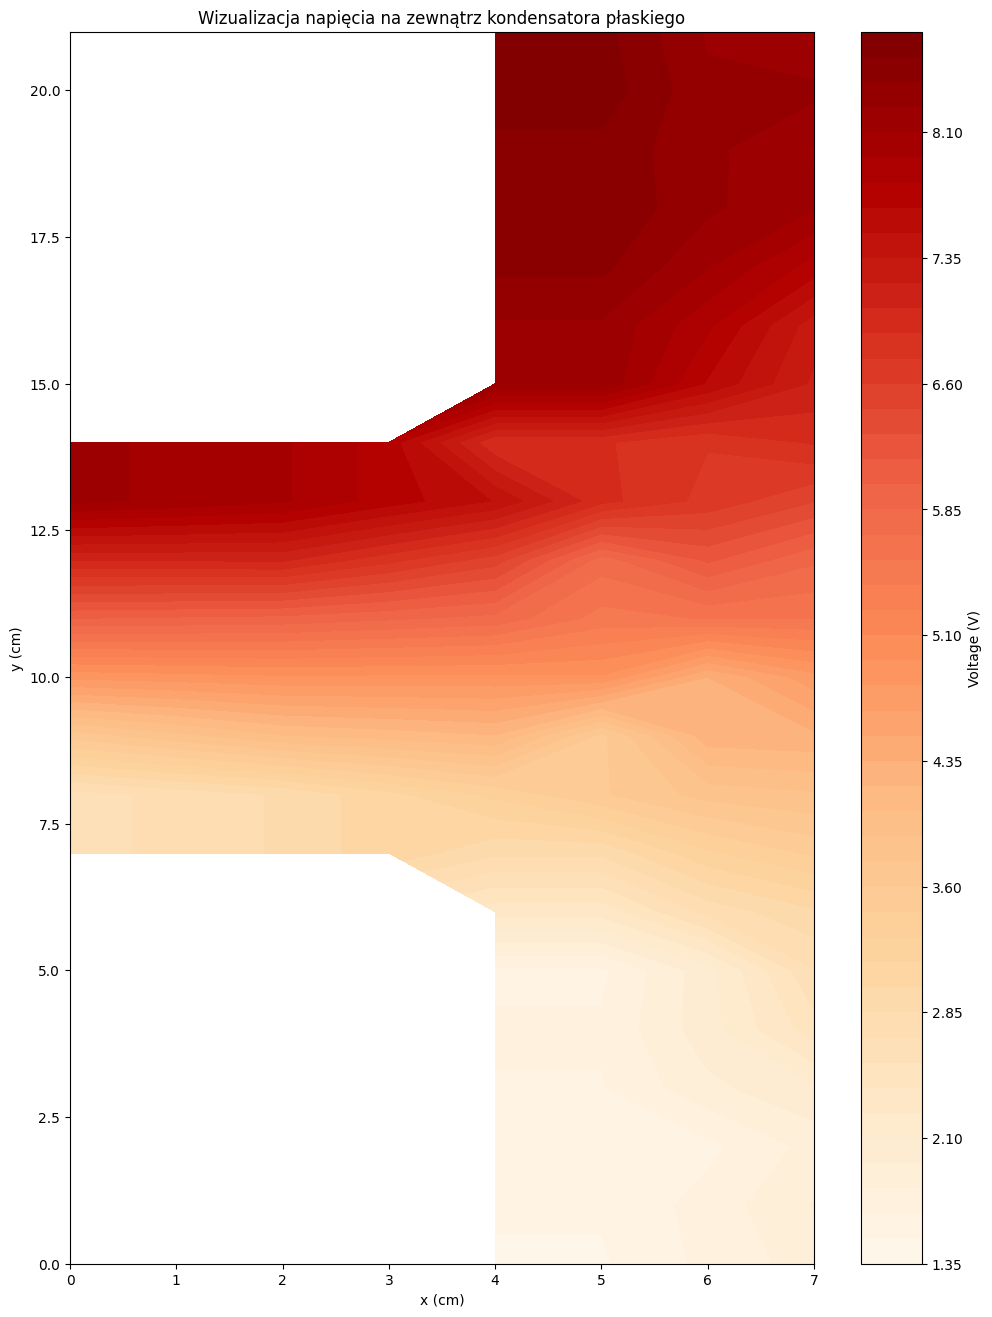

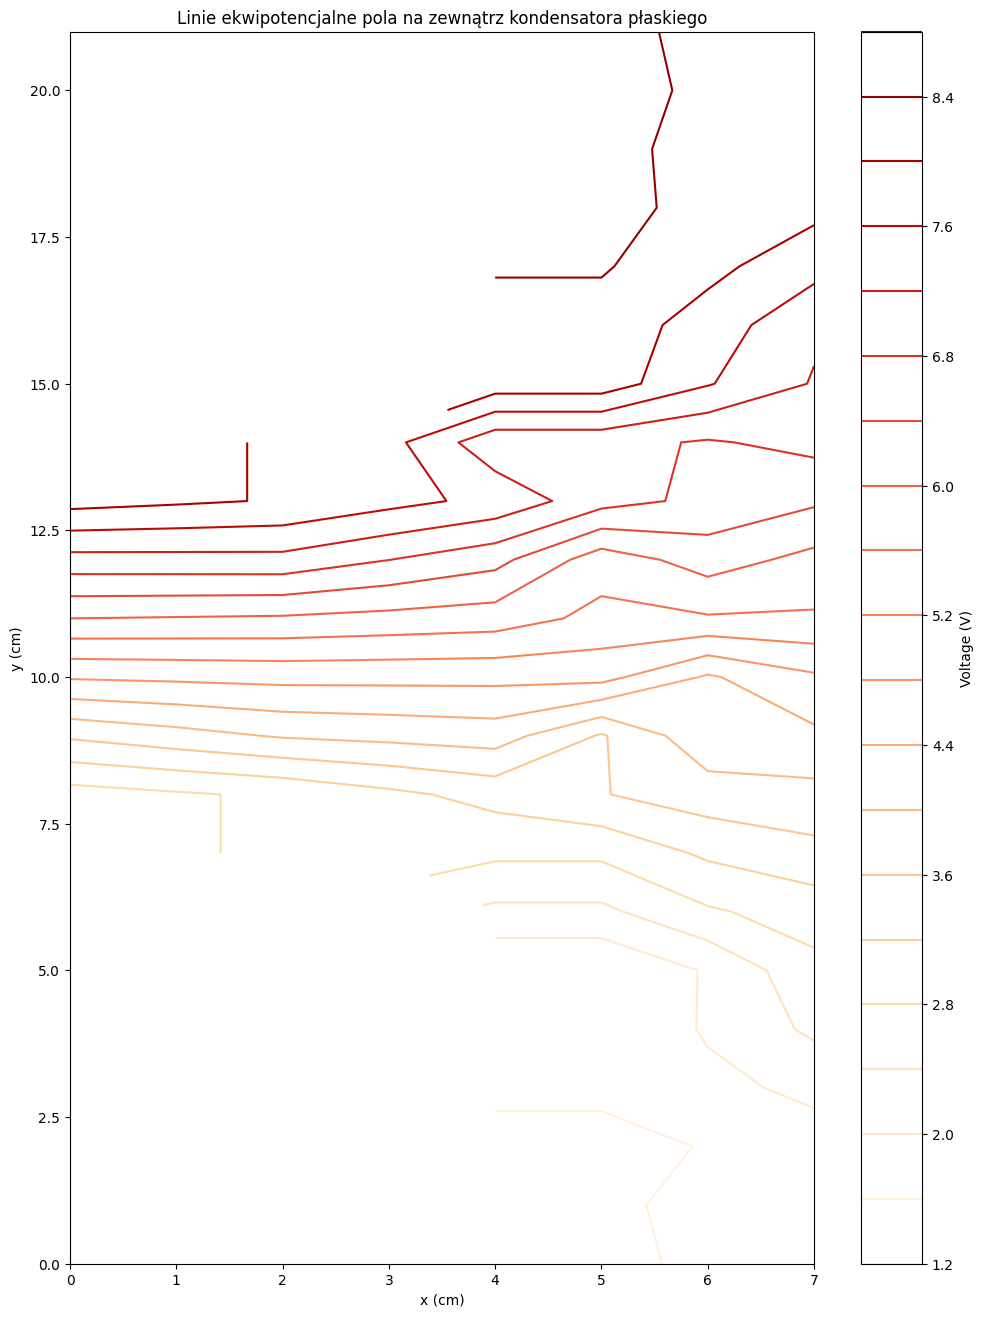

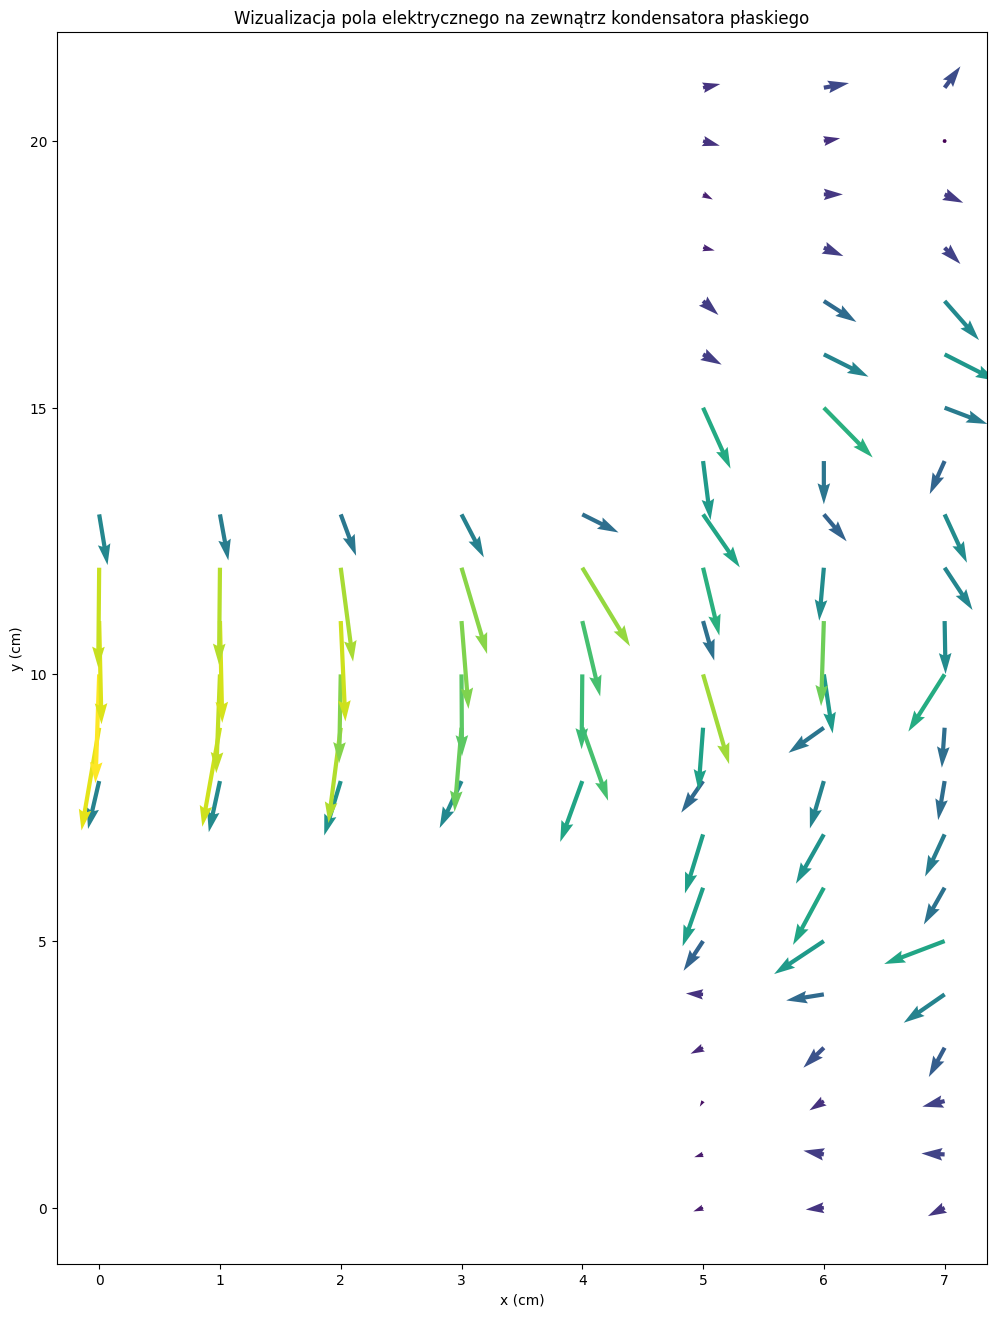

In [127]:
grid_size_x2 = V2.shape[1]
grid_size_y2 = V2.shape[0]
x2 = np.arange(grid_size_x2)  # X-coordinates
y2 = np.arange(grid_size_y2)  # Y-coordinates
X2, Y2 = np.meshgrid(x2, y2)  # Create a grid of coordinates
V_change = V2.to_numpy()

print(pd.DataFrame(V2))
for j in range(len(V_change)):
    if np.isnan(V_change[j][4]):
        V_change[j][4] = V_change[j][5]

for i in range(len(V_change[7])):
    print(np.isnan(V_change[7][i]))
    if np.isnan(V_change[7][i]):
        V_change[7][i] = V_change[8][i]
for i in range(len(V_change[7])):
    print(np.isnan(V_change[14][i]))
    if np.isnan(V_change[14][i]):
        V_change[14][i] = V_change[13][i]
print(pd.DataFrame(V_change))

Ey2, Ex2 = np.gradient(-V_change)
Ey2[7][4] = np.nan
Ex2[7][4] = np.nan
Ey2[14][4] = np.nan
Ex2[14][4] = np.nan

plt.figure(figsize=(12, 16))
plt.contourf(X2, Y2, V2, levels=50, cmap='OrRd')
plt.colorbar(label='Voltage (V)')
plt.title('Wizualizacja napięcia na zewnątrz kondensatora płaskiego')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')

plt.figure(figsize=(12, 16))
plt.contour(X2, Y2, V2, levels=20, cmap='OrRd')  # Plot electric field vectors
plt.title('Linie ekwipotencjalne pola na zewnątrz kondensatora płaskiego')
plt.colorbar(label='Voltage (V)')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')

magnitude = 2*np.sqrt(Ex2 ** 2 + Ey2 ** 2)
plt.figure(figsize=(12, 16))
plt.title('Wizualizacja pola elektrycznego na zewnątrz kondensatora płaskiego')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.quiver(X2, Y2, Ex2, Ey2, magnitude, color='Green', scale=10)


# Teraz zobaczymy linie ekwipotencjalne w kondensatorze cylindrycznym

(-8.0, 8.0)

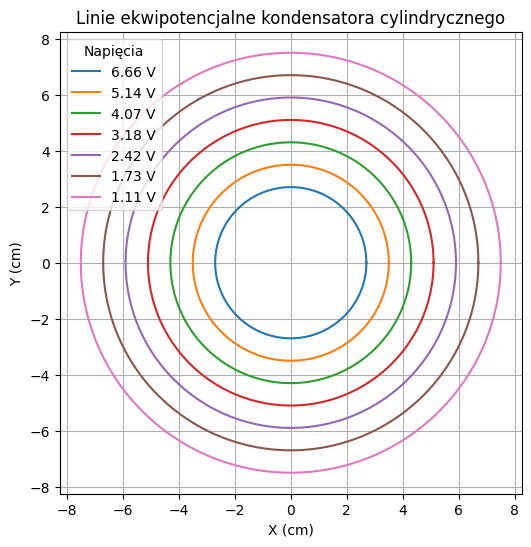

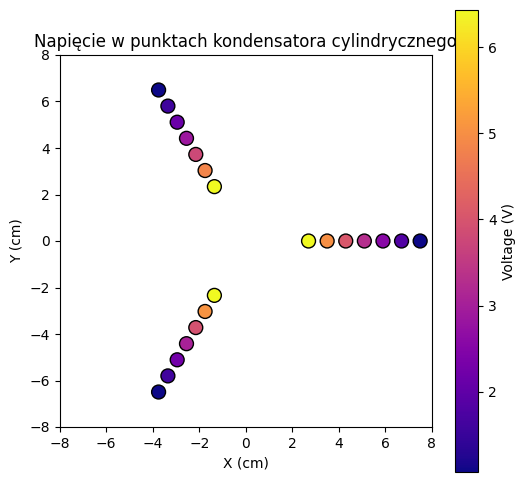

In [125]:
# Definiujemy odległości od środka kondensatora (w cm) i odpowiadające napięcia
radii = np.array([2.7, 3.5, 4.3, 5.1, 5.9, 6.7, 7.5])  # odległości r od środka kondensatora (1 cm, 2 cm, 3 cm)
voltages2 = np.array([[6.97, 5.39, 4.35,3.49,2.71,1.86,1.05],
                     [6.57,4.99,3.93,3,2.28,1.72,1.21],
                     [6.43,5.05,3.94,3.04,2.26,1.61,1.07]])  # odpowiadające napięcia na liniach ekwipotencjalnych
voltages = np.array([6.97, 5.39, 4.35,3.49,2.71,1.86,1.05])
for i in range(len(voltages2[0])):
    voltages[i] = np.round(np.mean(voltages2[:,i]), 2)

theta = np.linspace(0, 2*np.pi, 500)  # zakres kątów od 0 do 360 stopni

# Tworzymy wykres
plt.figure(figsize=(6,6))

# Rysujemy linie ekwipotencjalne dla każdej wartości promienia
for r, V in zip(radii, voltages):
    # Przekształcamy współrzędne biegunowe na kartezjańskie
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    # Rysowanie linii ekwipotencjalnej
    plt.plot(x, y, label=f'{V} V')  # każda linia ma etykietę z napięciem

# Dostosowanie osi i wyglądu wykresu
plt.gca().set_aspect('equal')  # Ustawiamy jednakową skalę na osiach X i Y
plt.xlabel('X (cm)')
plt.ylabel('Y (cm)')
plt.title('Linie ekwipotencjalne kondensatora cylindrycznego')
plt.legend(title='Napięcia')
plt.grid(True)

angles_degrees = np.array([0, 120, 240])
angles_radians = np.radians(angles_degrees)

# Now, we can plot the data in Cartesian coordinates
plt.figure(figsize=(6, 6))

# Loop through each set of voltages (for each angle)
for i, angle in enumerate(angles_radians):
    # Convert polar coordinates to Cartesian for each angle and radius
    x = radii * np.cos(angle)
    y = radii * np.sin(angle)
    
    # Plot the voltage values at each point using scatter
    plt.scatter(x, y, c=voltages2[i], cmap='plasma', s=100, edgecolor='black')

# Customize the plot
plt.gca().set_aspect('equal')
plt.colorbar(label='Voltage (V)')
plt.title('Napięcie w punktach kondensatora cylindrycznego')
plt.xlabel('X (cm)')
plt.ylabel('Y (cm)')
plt.xlim(-8, 8)
plt.ylim(-8, 8)


